<a href="https://colab.research.google.com/github/mosihan/UOB--Three-models-of-handwritten-digit-recognition/blob/main/LR_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

LR = LogisticRegression()
parameters = {'C':[0.1,1.0,10],'max_iter':[10,30,50,70,90,110]}

print("grid search")
grid = GridSearchCV(LR, parameters, cv=3, verbose=3,scoring='accuracy',n_jobs=-1)
grid.fit(X_train, y_train)
print("predicting")
print("score: ", grid.score(X_test, y_test)) 
print(grid.best_estimator_) 

end = datetime.datetime.now()
print (end-start)

grid search
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
grid.cv_results_

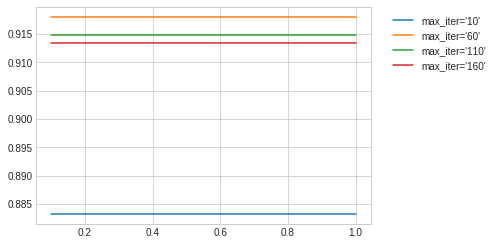

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

C=np.arange (0.1,1.1,0.1)
A=grid.cv_results_['mean_test_score']

i=0
for marker in ['10', '60', '110', '160']:
    plt.plot(C, B[i:i+10], label="max_iter='{0}'".format(marker))
    i=i+10
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")



In [ ]:
print(grid.cv_results_['mean_test_score'])

[0.09871667 0.09871667 0.09871667 0.88315    0.91551667 0.88315
 0.88315    0.91593333 0.88315    0.88315    0.9154     0.88315
 0.88315    0.91555    0.88315    0.88315    0.91548333 0.88315
 0.88315    0.91551667 0.88315    0.88315    0.91573333 0.88315
 0.88315    0.91553333 0.88315    0.88315    0.91523333 0.88315
 0.88315    0.91516667 0.88315   ]


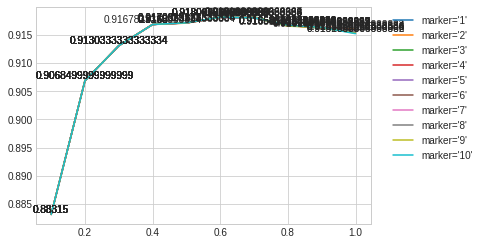

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

rng = np.random.RandomState(0)
C=np.arange (0.1,1.1,0.1)
A=grid.cv_results_['mean_test_score']

i=0
colors = rng.rand(10)
for marker in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']:
    plt.plot(C, A[i:i+10], label="marker='{0}'".format(marker))
    i=i+10
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

j=0
for range in np.arange(10):
  for a, b in zip(C, A[j:j+10]):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
  j=j+10

plt.xlabel('C')
plt.ylabel('y')
plt.title('title')

#axis[xmin, xmax, ymin, ymax]，
plt.axis([0.1, 2, 0.96, 0.98])

In [ ]:
from sklearn import metrics
best_model=grid.best_estimator_
y_test_pred=best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.92      0.93       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print('Training accuracy = {0}%'.format(np.round(best_model.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(best_model.score(X_test, y_test) * 100, 2)))

Training accuracy = 93.4%
Test accuracy = 92.48%


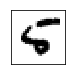

this should be 5
LR model think this is 6


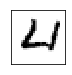

this should be 4
LR model think this is 6


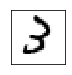

this should be 3
LR model think this is 2


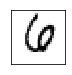

this should be 6
LR model think this is 7


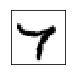

this should be 7
LR model think this is 4


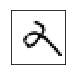

this should be 2
LR model think this is 9


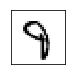

this should be 9
LR model think this is 3


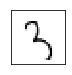

this should be 3
LR model think this is 8


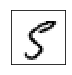

this should be 5
LR model think this is 7


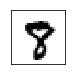

this should be 8
LR model think this is 7


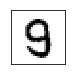

this should be 9
LR model think this is 3


In [ ]:
# plot function
import matplotlib

def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((28, 28)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

n=0
for index in np.arange(0,y_test_pred.shape[0]):
  if y_test_pred[index]!=y_test[index]:
    pick_one=index
    plot_an_image(X_test[pick_one, :])
    plt.show()
    print('this should be {}'.format(y_test[pick_one]))
    print('LR model think this is {}'.format(y_test_pred[pick_one]))
    n=n+1
    if n > 10:
      break
